In [ ]:
import pandas as pd # pandas is used to load and manipulate data and for One-Hot Encoding
import numpy as np # numpy is used to calculate the mean and standard deviation
import matplotlib.pyplot as plt # matplotlib is for drawing graphs
import matplotlib.colors as colors
from sklearn.model_selection import train_test_split # split  data into training and testing sets
from sklearn.preprocessing import scale # scale and center data
from sklearn.svm import SVC # this will make a support vector machine for classificaiton
from sklearn.model_selection import GridSearchCV # this will do cross validation
from sklearn.metrics import confusion_matrix # this creates a confusion matrix
# from sklearn.metrics import plot_confusion_matrix # draws a confusion matrix
from sklearn.decomposition import PCA # to perform PCA to plot the data

Dataset = https://archive.ics.uci.edu/dataset/45/heart+disease

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/heart+disease.zip (Unzipped Files)/processed.cleveland.data', header=None)

In [ ]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


We see that instead of nice column names, we just have column numbers. Since nice column names would make it easier to know how to format the data, let's replace the column numbers with the following column names:

**age**,

**sex**,

**cp**,
chest pain

**restbp**, resting blood pressure (in mm Hg)

**chol**, serum cholesterol in mg/dl

**fbs**, fasting blood sugar

**restecg**, resting electrocardiographic results

**thalach**, maximum heart rate achieved

**exang**, exercise induced angina

**oldpeak**, ST depression induced by exercise relative to rest

**slope**, the slope of the peak exercise ST segment.

**ca**, number of major vessels (0-3) colored by fluoroscopy

**thal**, this is short of thalium heart scan.
hd, diagnosis of heart disease, the predicted attribute



In [ ]:
df.columns = ['age',
              'sex',
              'cp',
              'restbp',
              'chol',
              'fbs',
              'restecg',
              'thalach',
              'exang',
              'oldpeak',
              'slope',
              'ca',
              'thal',
              'hd']
df.head()

,age,sex,cp,restbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,hd
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


## EDA

In [ ]:
df.dtypes

age        float64
sex        float64
cp         float64
restbp     float64
chol       float64
fbs        float64
restecg    float64
thalach    float64
exang      float64
oldpeak    float64
slope      float64
ca          object
thal        object
hd           int64
dtype: object

We see that that they are almost all float64, however, two columns, **ca** and **thal**, have the object type and one column, hd has int64.

The fact that the **ca** and **thal** columns have object data types suggests there is something funny going on in them. object datatypes are used when there are mixtures of things, like a mixture of numbers and letters. In theory, both **ca** and **thal** should just have a few values representing different categories, so let's investigate what's going on by printing out their unique values. We'll start with **ca**:

In [ ]:
print(df['ca'].unique())
print(df['thal'].unique())

['0.0' '3.0' '2.0' '1.0' '?']
['6.0' '3.0' '7.0' '?']


# Now Handling **Missing VAlues**

In [ ]:
len(df.loc[(df['ca'] == '?') | (df['thal'] == '?')])

6

In [ ]:
df.loc[(df['ca'] == '?') | (df['thal'] == '?')]

,age,sex,cp,restbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,hd
87,53.0,0.0,3.0,128.0,216.0,0.0,2.0,115.0,0.0,0.0,1.0,0.0,?,0
166,52.0,1.0,3.0,138.0,223.0,0.0,0.0,169.0,0.0,0.0,1.0,?,3.0,0
192,43.0,1.0,4.0,132.0,247.0,1.0,2.0,143.0,1.0,0.1,2.0,?,7.0,1
266,52.0,1.0,4.0,128.0,204.0,1.0,0.0,156.0,1.0,1.0,2.0,0.0,?,2
287,58.0,1.0,2.0,125.0,220.0,0.0,0.0,144.0,0.0,0.4,2.0,?,7.0,0
302,38.0,1.0,3.0,138.0,175.0,0.0,0.0,173.0,0.0,0.0,1.0,?,3.0,0


In [ ]:
len(df)

303

In [ ]:
df_no_missing = df.loc[(df['ca'] != '?') & (df['thal'] != '?')]
len(df_no_missing)

297

In [ ]:
df_no_missing['ca'].unique()

array(['0.0', '3.0', '2.0', '1.0'], dtype=object)

In [ ]:
df_no_missing['thal'].unique()

array(['6.0', '3.0', '7.0'], dtype=object)

# Format Data Part 1: Split the Data into Dependent and Independent Variables

In [ ]:
X = df_no_missing.drop('hd', axis = 1).copy()
X.head()

,age,sex,cp,restbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0


In [ ]:
y = df_no_missing['hd'].copy()
y.head()

0    0
1    2
2    1
3    0
4    0
Name: hd, dtype: int64

# Format the Data Part 2: One-Hot Encoding

Now that we have split the data frame into two pieces, X, which contains the data we will use to make, or predict, classifications, and y, which contains the known classifications in our training dataset, we need to take a closer look at the variables in X. The list bellow tells us what each variable represents and the type of data (float or categorical) it should contain:

age, Float

sex - Category

0 = female

1 = male

cp, chest pain, Category

1 = typical angina,

2 = atypical angina,

3 = non-anginal pain,

4 = asymptomatic

restbp, resting blood pressure (in mm Hg), Float

chol, serum cholesterol in mg/dl, Float

fbs, fasting blood sugar, Category

0 = >=120 mg/dl

1 = <120 mg/dl
restecg, resting electrocardiographic results, Category

1 = normal

2 = having ST-T wave abnormality

3 = showing probable or definite left ventricular hypertrophy
thalach, maximum heart rate achieved, Float
exang, exercise induced angina, Category

0 = no

1 = yes

oldpeak, ST depression induced by exercise relative to rest. Float
slope, the slope of the peak exercise ST segment, Category

1 = upsloping

2 = flat

3 = downsloping

ca, number of major vessels (0-3) colored by fluoroscopy, Float

thal, thalium heart scan, Category

3 = normal (no cold spots)

6 = fixed defect (cold spots during rest and exercise)

7 = reversible defect (when cold spots only appear during exercise)

Now, just to review, let's look at the data types in X to remember how python is seeing the data right now.

In [ ]:
X.dtypes

age        float64
sex        float64
cp         float64
restbp     float64
chol       float64
fbs        float64
restecg    float64
thalach    float64
exang      float64
oldpeak    float64
slope      float64
ca          object
thal        object
dtype: object

In [ ]:
X['cp'].unique()

array([1., 4., 3., 2.])

In [ ]:
pd.get_dummies(X,columns = ['cp']).head()

,age,sex,restbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,cp_1.0,cp_2.0,cp_3.0,cp_4.0
0,63.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,1,0,0,0
1,67.0,1.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,0,0,0,1
2,67.0,1.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,0,0,0,1
3,37.0,1.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0,0,1,0
4,41.0,0.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0,1,0,0


In [ ]:
X_encoded = pd.get_dummies(X, columns = ['cp', 'restecg', 'slope', 'thal'])

X_encoded.head()

,age,sex,restbp,chol,fbs,thalach,exang,oldpeak,ca,cp_1.0,...,cp_4.0,restecg_0.0,restecg_1.0,restecg_2.0,slope_1.0,slope_2.0,slope_3.0,thal_3.0,thal_6.0,thal_7.0
0,63.0,1.0,145.0,233.0,1.0,150.0,0.0,2.3,0.0,1,...,0,0,0,1,0,0,1,0,1,0
1,67.0,1.0,160.0,286.0,0.0,108.0,1.0,1.5,3.0,0,...,1,0,0,1,0,1,0,1,0,0
2,67.0,1.0,120.0,229.0,0.0,129.0,1.0,2.6,2.0,0,...,1,0,0,1,0,1,0,0,0,1
3,37.0,1.0,130.0,250.0,0.0,187.0,0.0,3.5,0.0,0,...,0,1,0,0,0,0,1,1,0,0
4,41.0,0.0,130.0,204.0,0.0,172.0,0.0,1.4,0.0,0,...,0,0,0,1,1,0,0,1,0,0


In [ ]:
y.unique()

array([0, 2, 1, 3, 4])

In [ ]:
y_not_zero_idx = y>0
y[y_not_zero_idx] = 1
y.unique()

array([0, 1])

# Format the Data Part 3: Centering and Scaling

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)
X_train_scaled = scale(X_train)
X_test_scaled = scale(X_test)

# Build A Preliminary Support Vector Machine

In [ ]:
clf_svm = SVC(random_state = 42)
clf_svm.fit(X_train_scaled, y_train)

SVC(random_state=42)

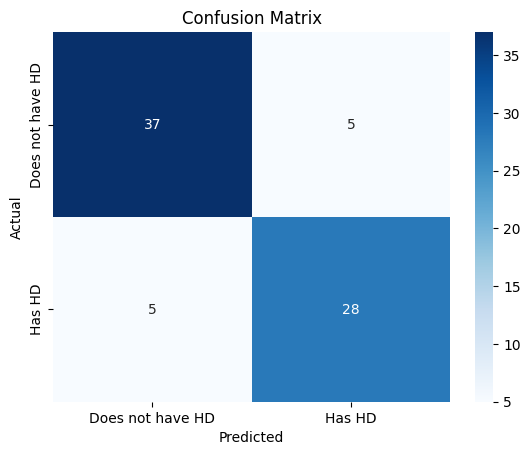

In [ ]:
import seaborn as sns
# Predictions on the test set
y_pred = clf_svm.predict(X_test_scaled)

# Generating the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plotting the confusion matrix with Seaborn heatmap
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', xticklabels=["Does not have HD", "Has HD"],
            yticklabels=["Does not have HD", "Has HD"])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Optimize Parameters with Cross Validation

In [ ]:
param_grid = [
    {'C': [1, 10, 100,1000],
    'gamma': [0.001, 0.0001],
    'kernel': ['rbf']},
]

optimal_params = GridSearchCV(SVC(), param_grid, cv=5, verbose = 0)

optimal_params.fit(X_train_scaled, y_train)
optimal_params.best_params_

{'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}

# Building, Evaluating, Drawing, and Interpreting the Final Support Vector Machine

In [ ]:
clf_svm = SVC(random_state = 42, C=10, gamma=0.001)
clf_svm.fit(X_train_scaled, y_train)

SVC(C=10, gamma=0.001, random_state=42)

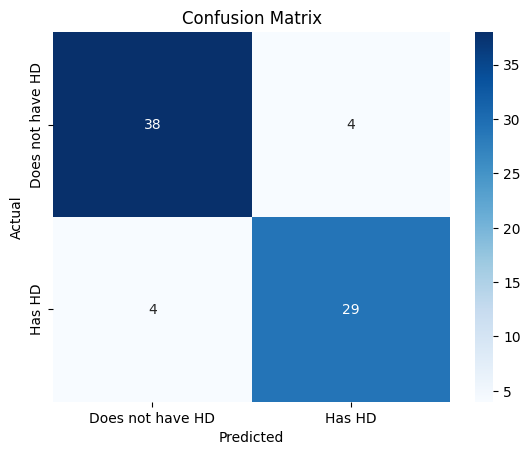

In [ ]:
import seaborn as sns
# Predictions on the test set
y_pred = clf_svm.predict(X_test_scaled)

# Generating the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plotting the confusion matrix with Seaborn heatmap
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', xticklabels=["Does not have HD", "Has HD"],
            yticklabels=["Does not have HD", "Has HD"])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
len(df.columns)

14

So we see that there are 14 features, or columns, in X. This is a problem because it would require a 14-dimensional graph, one dimension per feature used to make predictions, to plot the data in its raw form. If we wanted to, we could just pick two features at random to use as x and y-axes on our graph, but instead , we will use PCA (Principal Component Analysis) to combine the 14 features into 2 orthogonal meta-features that we can use as axes for a graph. If you don't already know about PCA, don't sweat it. For now, just know that it is a way to shrink a 14-dimensional graph into a 2-dimensional graph.

However, before we shrink the graph, let's first determine how accurate the shrunken graph will be. If it's relatively accurate, than it makes sense to draw the 2-Dimensional graph. If not, the shrunken graph will not be very useful. We can determine the accuracy of the graph by drawing something called a scree plot.

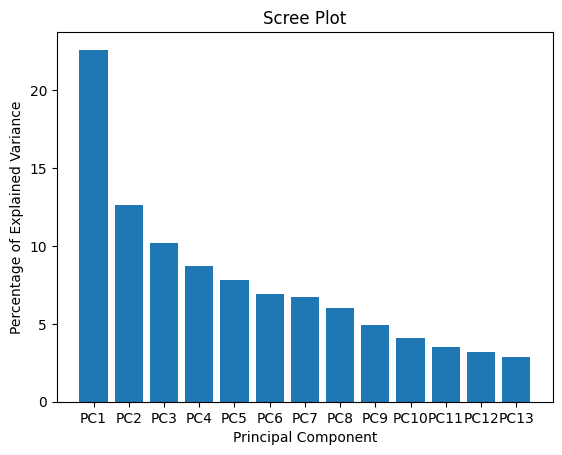

In [ ]:
pca = PCA() # By default, PCA() centers the data, but does not scale it.
X_train_pca = pca.fit_transform(X_train_scaled)

per_var = np.round(pca.explained_variance_ratio_* 100, decimals=1)
labels = ['PC' + str(x) for x in range(1, len(per_var)+1)]

plt.bar(x=range(1,len(per_var)+1), height=per_var, tick_label=labels)
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Component')
plt.title('Scree Plot')
plt.show()

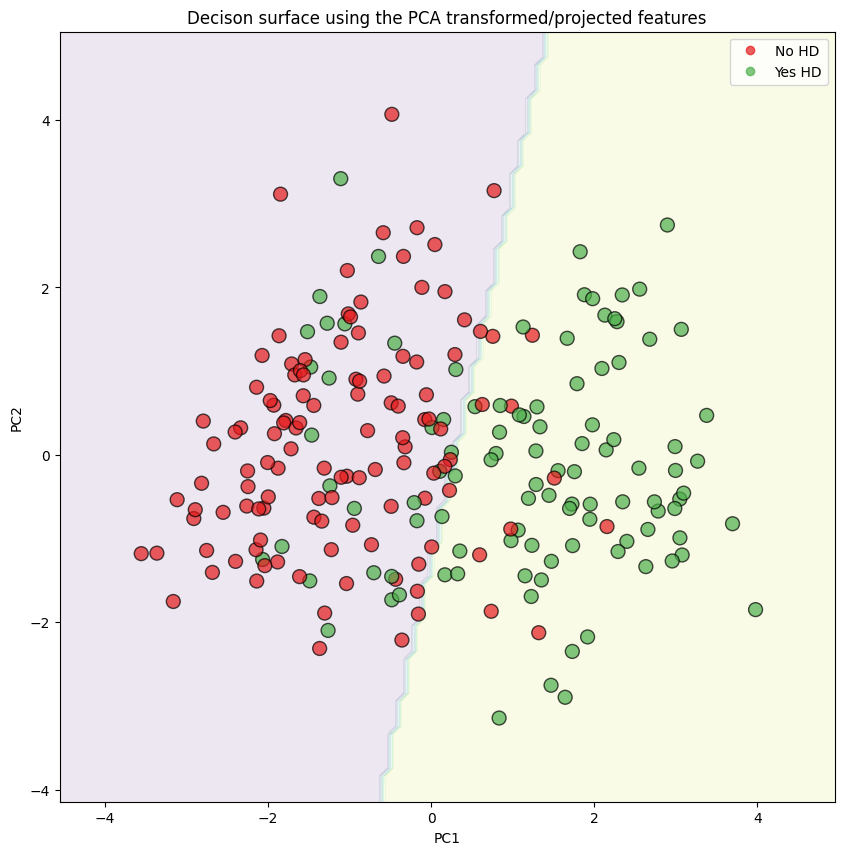

In [ ]:
pc1 = X_train_pca[:, 0]
pc2 = X_train_pca[:, 1]

## NOTE:
## pc1 contains the x-axis coordinates of the data after PCA
## pc2 contains the y-axis coordinates of the data after PCA

## Now we fittthe SVM to the x and y-axis coordinates
## of the data after PCA dimension reduction...
clf_svm.fit(np.column_stack((pc1, pc2)), y_train)

## Now create a matrix of points that we can use to show
## the decision regions.
## The matrix will be a little bit larger than the
## transformed PCA points so that we can plot all of
## the PCA points on it without them being on the edge
x_min = pc1.min() - 1
x_max = pc1.max() + 1

y_min = pc2.min() - 1
y_max = pc2.max() + 1

xx, yy = np.meshgrid(np.arange(start=x_min, stop=x_max, step=0.1),
                     np.arange(start=y_min, stop=y_max, step=0.1))

## now we will classify every point in that
## matrix with the SVM. Points on one side of the
## classification boundary will get 0, and points on the other
## side will get 1.
Z = clf_svm.predict(np.column_stack((xx.ravel(), yy.ravel())))
## Right now, Z is just a long array of lots of 0s and 1s, which
## reflect how each point in the mesh was classified.
## We use reshape() so that each classification (0 or 1) corresponds
## to a specific point in the matrix.
Z = Z.reshape(xx.shape)

fig, ax = plt.subplots(figsize=(10,10))
## now we will use contourf() to draw a filled contour plot
## using the matrix values and classifications.
## The contours will be filled according to the
## predicted classifications (0s and 1s) in Z
ax.contourf(xx, yy, Z, alpha=0.1)

## now create custom colors for the actual data points
cmap = colors.ListedColormap(['#e41a1c', '#4daf4a'])
## now darw the actual data points - these will
## be colored by their known (not predcited) classifications
## NOTE: setting alpha=0.7 lets us see if we are covering up a point
scatter = ax.scatter(pc1, pc2, c=y_train,
               cmap=cmap,
               s=100,
               edgecolors='k', ## 'k' = black
               alpha=0.7)

## now create a legend
legend = ax.legend(scatter.legend_elements()[0],
                   scatter.legend_elements()[1],
                    loc="upper right")
legend.get_texts()[0].set_text("No HD")
legend.get_texts()[1].set_text("Yes HD")

## now add axis labels and titles
ax.set_ylabel('PC2')
ax.set_xlabel('PC1')
ax.set_title('Decison surface using the PCA transformed/projected features')
# plt.savefig('svm.png')
plt.show()

# BAM!!!
The pink side of the graph on the left is the area were all datapoints will be predicted to not have heart disease. The yellow side of the graph on the right is the area where all datapoints will be predicted to have heart disease. The the dots are datapoints in the training dataset and are color coded by their known classifications: red is for those that did not have heart disease and green is for those that did have heart disease.